# Analytics - Loan Prediction

### Se tiene como tarea predecir la elegibilidad para un prestamo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Analisis Exploratorio

In [3]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
features = list(train.columns.drop('Loan_Status').drop('Loan_ID'))
#Verificamos la cantidad de datos y los nulos
print 'Cantidad de datos: ',len(train)
print 'Nulos:'
print train.isnull().sum()

Cantidad de datos:  614
Nulos:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Identificamos las variables numéricas
num_features = list(train.describe().columns)
cat_features = list(train[features].drop(num_features, axis=1).columns)
print 'Variables Numericas'
print num_features
print '\nVariables Categoricas'
print cat_features

Variables Numericas
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Variables Categoricas
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [6]:
#distribución de las variables categóricas
for feature in cat_features:
    print ("-" * 40)
    print(train.groupby(feature, axis = 0)[feature].count().sort_values(ascending = False))

----------------------------------------
Gender
Male      489
Female    112
Name: Gender, dtype: int64
----------------------------------------
Married
Yes    398
No     213
Name: Married, dtype: int64
----------------------------------------
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
----------------------------------------
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
----------------------------------------
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
----------------------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [7]:
#Seleccionar variables categoricas nominales:
cnom_features = [ 'Gender',
                 'Married',
                 'Education',
                 'Self_Employed',
                 'Property_Area']

#Seleccionar variables categoricas ordinales:
cor_features = ['Dependents']

### Visualización de Datos

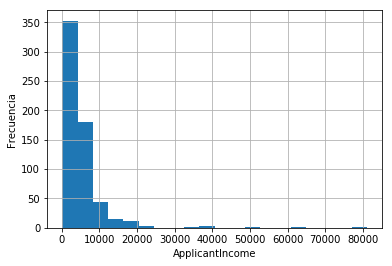

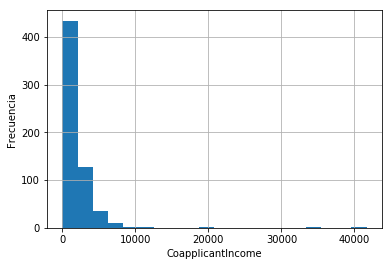

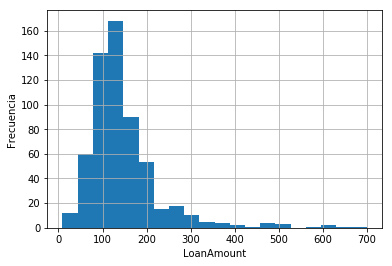

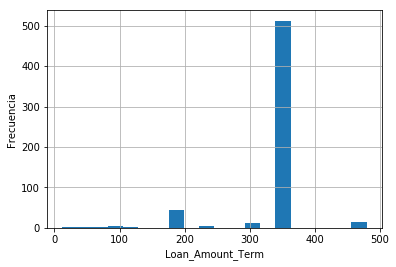

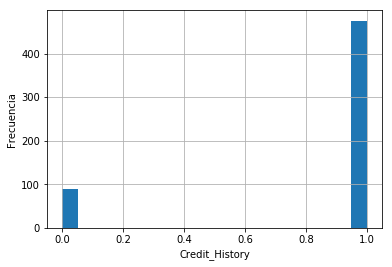

In [8]:
import matplotlib.pyplot as plt
for feature in num_features:
    train[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

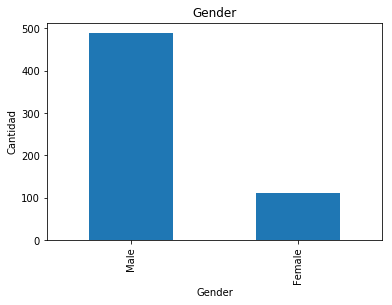

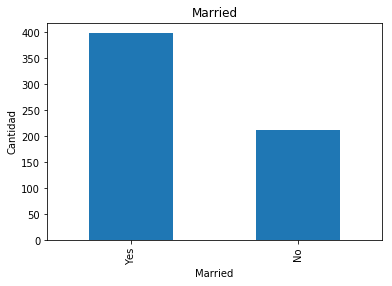

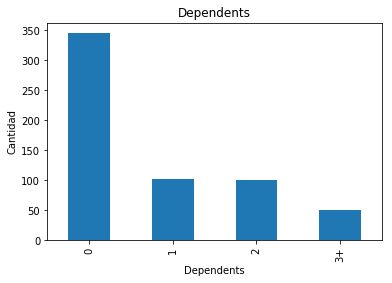

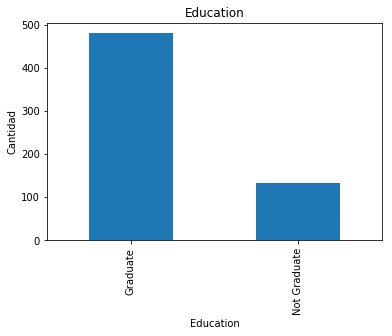

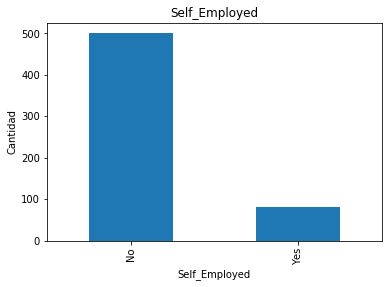

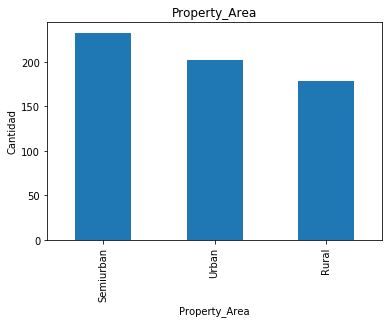

In [9]:
for feature in cat_features:
    var = train.groupby(feature)[feature].count().sort_values(ascending = False)
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Cantidad')
    ax1.set_title(feature)
    var.plot(kind='bar')
    plt.show()

### Variables vs Target

In [10]:
yes = train[train.Loan_Status == 'Y']
print (yes.shape)
yes.head()

(422, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
nope = train[train.Loan_Status == 'N']
print (nope.shape)
nope.head()

(192, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N


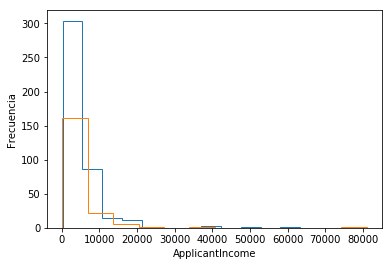

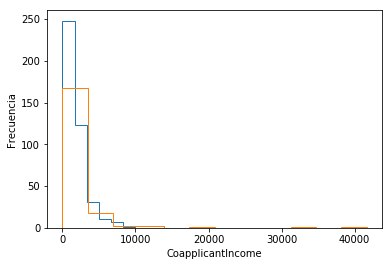

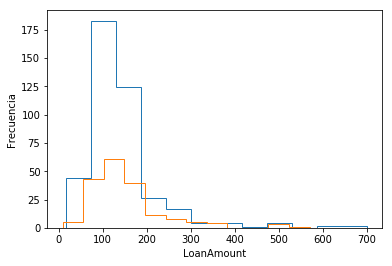

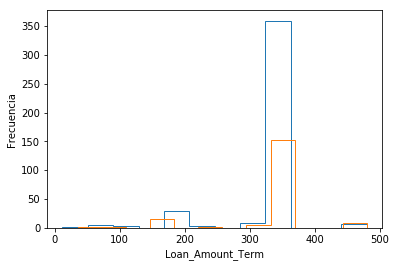

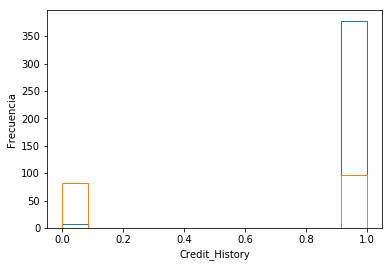

In [12]:
for feature in num_features:
    #plt.figure(figsize=(10, 8))
    plt.hist(yes[~yes[feature].isnull()][feature], 12, facecolor='blue', label='yes', histtype='step')
    plt.hist(nope[~nope[feature].isnull()][feature], 12, facecolor='red', label='no', histtype='step')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

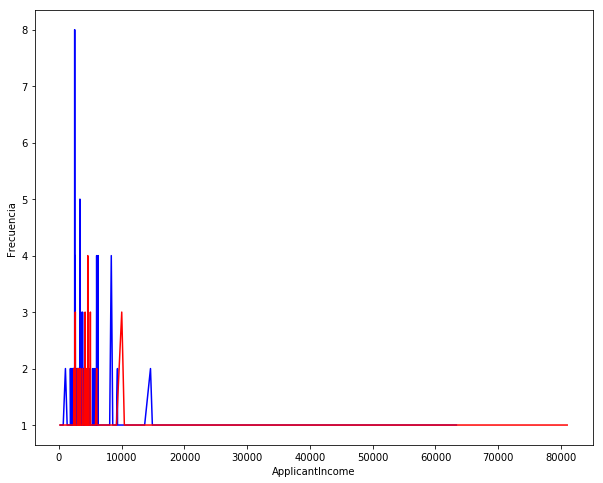

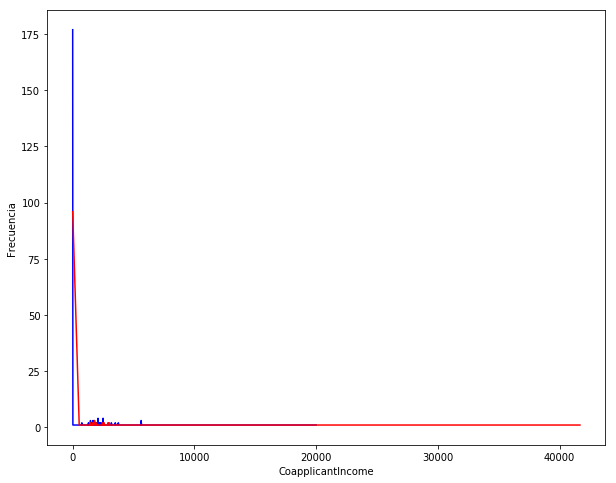

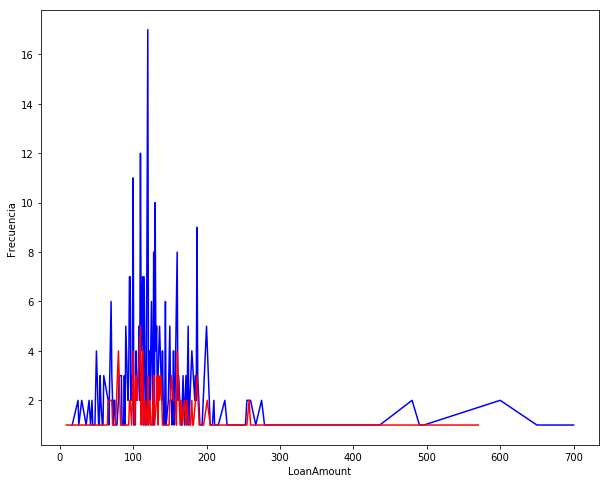

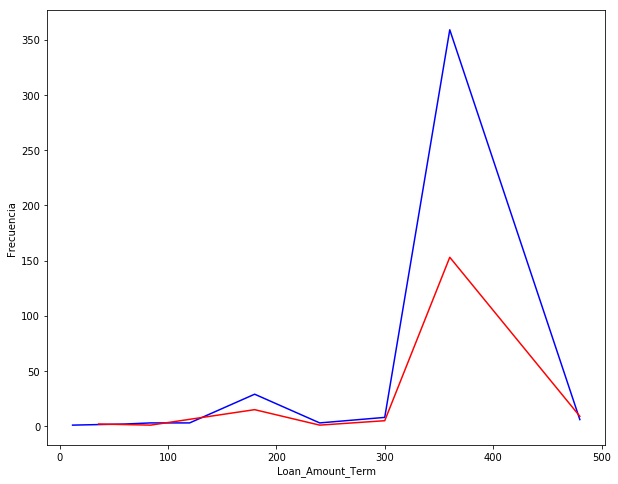

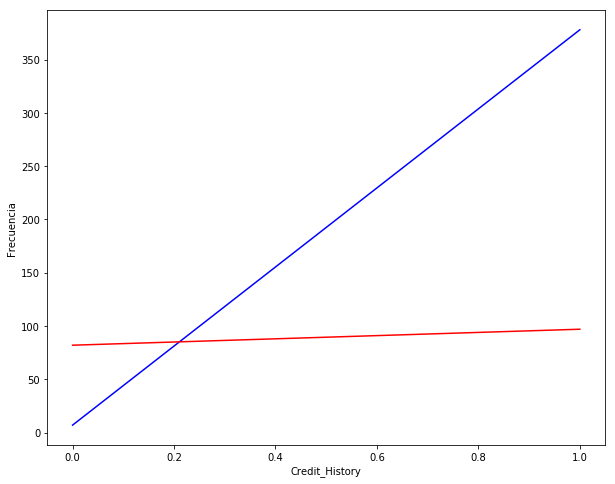

In [13]:
for feature in num_features:
    plt.figure(figsize=(10, 8))
    i=pd.Series(yes[~yes[feature].isnull()][feature].unique()).sort_values()
    f=yes.groupby(feature)['Loan_Status'].count()
    plt.plot(i,f,'b')
    i=pd.Series(nope[~nope[feature].isnull()][feature].unique()).sort_values()
    f=nope.groupby(feature)['Loan_Status'].count()
    plt.plot(i,f,'r')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.show()

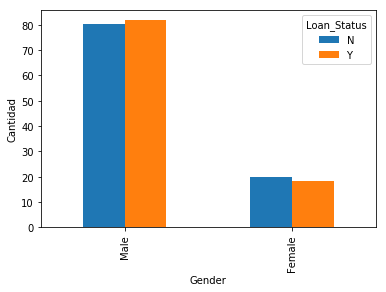

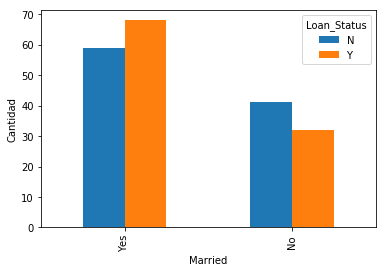

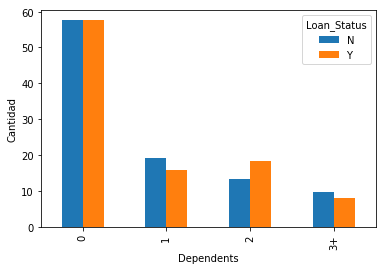

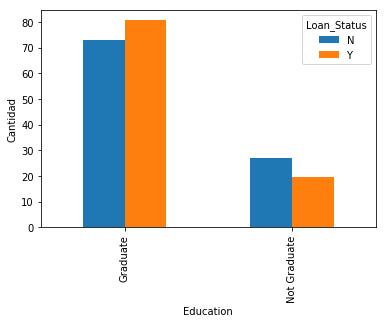

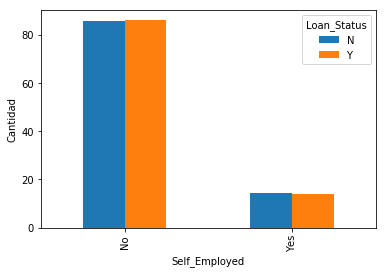

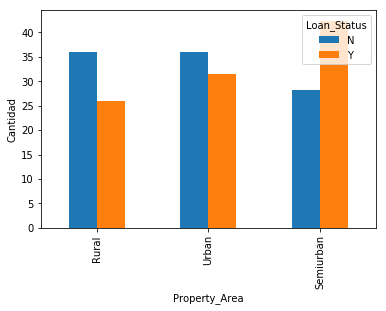

In [14]:
for feature in cat_features:
    var = pd.crosstab(index=train[feature], columns=train['Loan_Status']).apply(lambda r: r/r.sum()*100,axis=0).sort_values('N',ascending = False)
    var.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Cantidad')
    plt.show()

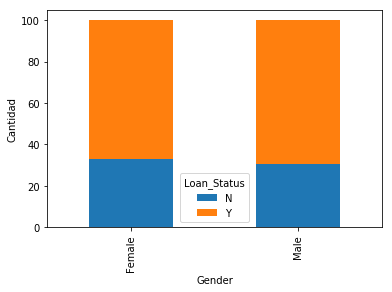

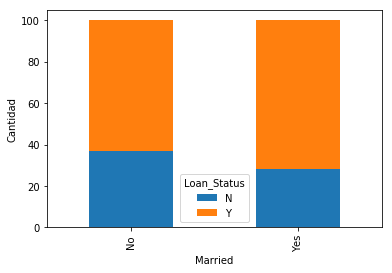

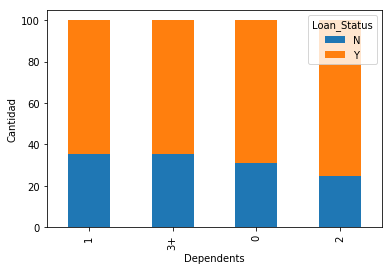

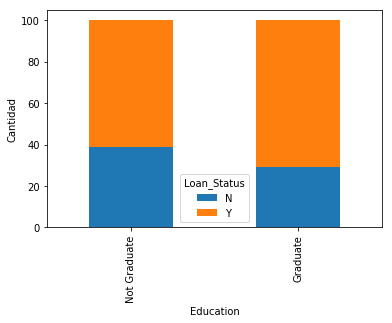

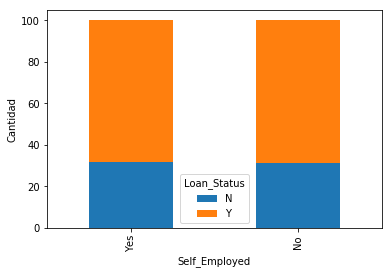

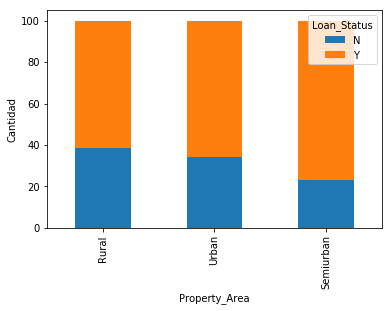

In [15]:
for feature in cat_features:
    var = pd.crosstab(index=train[feature], columns=train['Loan_Status']).apply(lambda r: r/r.sum()*100,axis=1).sort_values('N',ascending = False)
    var.plot(kind='bar', stacked = True)
    plt.xlabel(feature)
    plt.ylabel('Cantidad')
    plt.show()

In [17]:
import matplotlib as mpl
import seaborn as sns 
cmap = mpl.colors.ListedColormap(sns.color_palette("hls", 3))
for feature in features: 
    for feature2 in features: 
        plt.scatter(train[feature], train[feature2], c=train['Loan_Status'], cmap=cmap)
        plt.xlabel(feature)
        plt.ylabel(feature2)
        plt.show()

ValueError: Invalid RGBA argument: 'N'

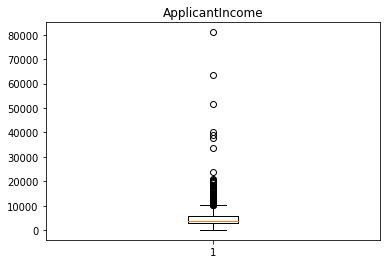

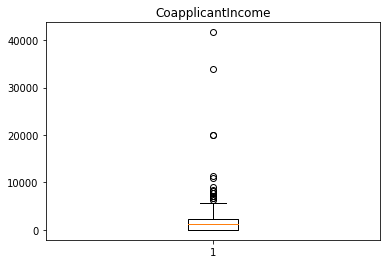

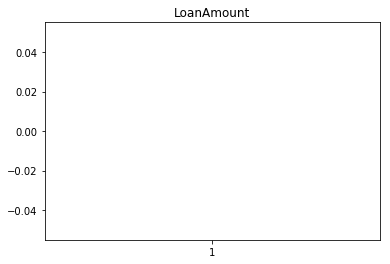

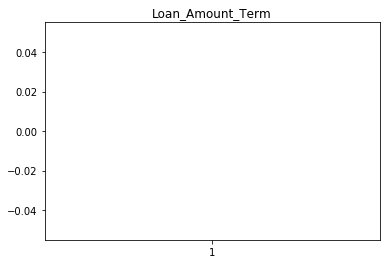

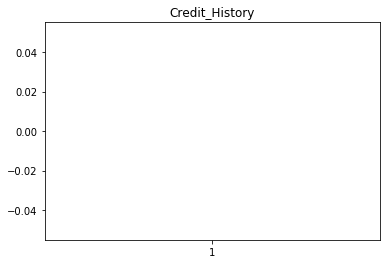

In [20]:
#Diagrama de Cajas
for feature in num_features:
    plt.boxplot(train[feature])
    plt.title(feature)
    plt.show()

### Eliminación de Outliers y nulos

In [21]:
# Consideramos los outliers
features_num_outliers = ['CoapplicantIncome']

In [22]:
for feature in features_num_outliers:
    train.loc[train[feature] > int(train[feature].quantile([.75]))+0.5*(int(train[feature].quantile([.75]))-int(train[feature].quantile([.25]))),feature]=int(train[feature].quantile([.75]))

In [23]:
#Eliminar la columna Loan_ID
#train.drop(train.columns[0],axis=1,inplace=True)
#Verificamos los valores de Loan amount para llenar los nulls
print 'Loan Amount'
display(train['LoanAmount'].describe())
print train['LoanAmount'].mean(),train['LoanAmount'].median(),train['LoanAmount'].mode()

Loan Amount


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

146.412162162 128.0 0    120.0
dtype: float64


In [24]:
#Rellenamos los nulls con la mediana y mostramos en pantalla
train.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
#Verificamos los valores de Loan amount term para llenar los nulls
print 'Loan_Amount_Term'
print 'Valores:',train['Loan_Amount_Term'].unique()
print 'Media\tMediana\tModa'
print train['Loan_Amount_Term'].mean(),train['Loan_Amount_Term'].median(),train['Loan_Amount_Term'].mode()

Loan_Amount_Term
Valores: [ 360.  120.  240.   nan  180.   60.  300.  480.   36.   84.   12.]
Media	Mediana	Moda
342.0 360.0 0    360.0
dtype: float64


In [26]:
#Rellenamos los nulls con la moda y mostramos en pantalla
train.Loan_Amount_Term.fillna(train['Loan_Amount_Term'].median(), inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
#Verificamos los valores de Credit history term para llenar los nulls
print 'Credit_History'
print 'Valores: ',train['Credit_History'].unique()
print 'Media\t\tMediana\tModa'
print train['Credit_History'].mean(),train['Credit_History'].median(),train['Credit_History'].mode()

Credit_History
Valores:  [  1.   0.  nan]
Media		Mediana	Moda
0.84219858156 1.0 0    1.0
dtype: float64


In [28]:
#Rellenamos los nulls con la moda y mostramos en pantalla
train.Credit_History.fillna(train.Credit_History.median(), inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
#Verificamos los valores de Dependents para llenar los nulls
print 'Dependents'
print 'Valores: ',train['Dependents'].unique()
#Reemplazamos el valor 3+ por 4
train['Dependents'] = train.Dependents.map({'0':0, '1':1,'2':2,'3+':4})
print train['Dependents'].mean(),train['Dependents'].median(),train['Dependents'].mode()

Dependents
Valores:  ['0' '1' '2' '3+' nan]
0.848080133556 0.0 0    0.0
dtype: float64


In [30]:
#Rellenamos los nulls con la moda y mostramos en pantalla
train.Dependents.fillna(train['Dependents'].median(), inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [31]:
#Corregimos Loan_Status
train['Loan_Status'] = train.Loan_Status.map({'N':0, 'Y':1})

#Evaluamos el atributo Gender, Married, Education y Self_Employed
print 'Gender'
train['Gender'] = train.Gender.map({'Male':0, 'Female':1})
print 'Valores: ',train['Gender'].unique()
print 'Moda:',train['Gender'].mode()

print 'Married'
train['Married'] = train.Married.map({'No':0, 'Yes':1})
print 'Valores: ',train['Married'].unique()
print 'Moda:',train['Married'].mode()

print 'Education'
train['Education'] = train.Education.map({'Not Graduate':0, 'Graduate':1})
print 'Valores: ',train['Education'].unique()
print 'Education',train['Education'].mode()

print 'Self_Employed'
train['Self_Employed'] = train.Self_Employed.map({'No':0, 'Yes':1})
print 'Valores: ',train['Self_Employed'].unique()
print 'Self_Employed',train['Self_Employed'].mode()

Gender
Valores:  [  0.   1.  nan]
Moda: 0    0.0
dtype: float64
Married
Valores:  [  0.   1.  nan]
Moda: 0    1.0
dtype: float64
Education
Valores:  [1 0]
Education 0    1
dtype: int64
Self_Employed
Valores:  [  0.   1.  nan]
Self_Employed 0    0.0
dtype: float64


In [32]:
#Rellenamos los nulls con la moda y mostramos en pantalla
train.Gender.fillna(train['Gender'].median(), inplace=True)
train.Self_Employed.fillna(train['Self_Employed'].median(), inplace=True)
train.Married.fillna(train['Married'].median(), inplace=True)
train.Education.fillna(train['Education'].median(), inplace=True)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [33]:
#Podemos generar nuevas columnas
print 'Valores: ',train['Property_Area'].unique()
prop_dummies = pd.get_dummies(train.Property_Area,prefix='prop')
prop_dummies.head()

Valores:  ['Urban' 'Rural' 'Semiurban']


,prop_Rural,prop_Semiurban,prop_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [34]:
prop_dummies.drop(prop_dummies.columns[0], axis=1, inplace=True)
train = pd.concat([train, prop_dummies], axis=1)

In [35]:
#Verificamos que ya no tenemos nulls
print train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
prop_Semiurban       0
prop_Urban           0
dtype: int64


# Modelo Predictivo

In [36]:
#Separación de data / Definición de dominio

features=['Gender','Married','Dependents',#'Education',
          'ApplicantIncome','CoapplicantIncome',
          #Property_Area,
          #'prop_Semiurban','prop_Urban',
          'Self_Employed','LoanAmount',#'Loan_Amount_Term',
          'Credit_History']
X = train[features]
y = train.Loan_Status

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [37]:
#Modelo 1: Regresion logistica

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.75974025974


<h3>Evaluación de algoritmos genérico</h3>

Extraido de http://ataspinar.com/2017/05/26/classification-with-scikit-learn/

Define una función que evalúa los datos en diversos modelos de clasificación y muestra sus scores.

En resumen...
<img src="http://cathyreisenwitz.com/wp-content/uploads/2016/01/no.jpg">

In [38]:
# Definición de funcion de evaluacion de modelos y muestra de tabla

import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators = 18),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}
no_classifiers = len(dict_classifiers.keys())
 
def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score', 'test_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [39]:
#Evaluacion
df_results = batch_classify(X_train, y_train, X_test, y_test)
display(df_results.sort_values(by='test_score', ascending=False))

trained Gradient Boosting Classifier in 0.05 s
trained Neural Net in 0.19 s
trained Logistic Regression in 0.01 s
trained Decision Tree in 0.01 s
trained Naive Bayes in 0.00 s
trained Linear SVM in 0.08 s
trained Nearest Neighbors in 0.00 s
trained Random Forest in 0.04 s


,classifier,train_score,test_score,training_time
4,Naive Bayes,0.810870,0.766234,0.002351
7,Random Forest,0.993478,0.766234,0.044272
0,Gradient Boosting Classifier,0.893478,0.759740,0.051348
2,Logistic Regression,0.821739,0.759740,0.007416
3,Decision Tree,1.000000,0.688312,0.006007
5,Linear SVM,1.000000,0.675325,0.076504
6,Nearest Neighbors,0.719565,0.636364,0.001166
1,Neural Net,0.554348,0.538961,0.190553


# Aplicación del modelo en la data solicitada

In [ ]:
#Repetimos para la data de Test
test = pd.read_csv('test.csv')
#test.drop(test.columns[0],axis=1,inplace=True)
test.head()
test.isnull().sum()

In [ ]:
#Rellenamos analogamente los nulls
test.LoanAmount.fillna(test.LoanAmount.median(), inplace=True)
test.Loan_Amount_Term.fillna(test['Loan_Amount_Term'].median(), inplace=True)
test.Credit_History.fillna(test.Credit_History.median(), inplace=True)

test['Dependents'] = test.Dependents.map({'0':0, '1':1,'2':2,'3':3,'3+':4})
test.Dependents.fillna(test['Dependents'].median(), inplace=True)

test['Gender'] = test.Gender.map({'Male':0, 'Female':1})
test.Gender.fillna(test['Gender'].median(), inplace=True)

test['Married'] = test.Married.map({'No':0, 'Yes':1})
test.Married.fillna(test['Married'].median(), inplace=True)

test['Education'] = test.Education.map({'Not Graduate':0, 'Graduate':1})
test.Education.fillna(test['Education'].median(), inplace=True)

test['Self_Employed'] = test.Self_Employed.map({'No':0, 'Yes':1})
test.Self_Employed.fillna(test['Self_Employed'].median(), inplace=True)

print test.isnull().sum()

In [ ]:
# Generamos la data dummy
prop_dummies = pd.get_dummies(test.Property_Area,prefix='prop')
prop_dummies.drop(prop_dummies.columns[0], axis=1, inplace=True)
test = pd.concat([test, prop_dummies], axis=1)
test.head()

In [ ]:
# Evaluación en data test
predictions = logreg.predict(test[features])
# Almacenamiento en archivo Loan_submission
submission = pd.DataFrame({ 'Loan_ID': test['Loan_ID'],
                            'Loan_Status': predictions })
submission.to_csv("Loan_submission.csv", index=False)
test[features].tail()